In [1]:
import tkinter as tk
import pandas as pd
import numpy as np

import geopandas as gpd

import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

from shapely.geometry import Point



ImportError: DLL load failed while importing _multiarray_umath: The specified module could not be found.

ImportError: DLL load failed while importing _multiarray_umath: The specified module could not be found.

In [2]:
combined_gdf = pd.read_csv("data/sensors_chp.csv")
combined_gdf.reset_index()[:5]

,index,Unnamed: 0,date,Sensor ID,Reading,name,geometry,"pm2.5, мкг","ТЭЦ2, тонн","ТЭЦ3, тонн"
0,0,0,2019-03-22,1,0.000000,Сейфуллина - Дулатова (TS225957),POINT (76.93899999999999 43.313),89.203308,8643.0,0.0
1,1,1,2019-03-23,1,0.000000,Сейфуллина - Дулатова (TS225957),POINT (76.93899999999999 43.313),90.783514,8171.0,0.0
2,2,2,2019-03-24,1,208.403433,Сейфуллина - Дулатова (TS225957),POINT (76.93899999999999 43.313),47.493938,7133.0,0.0
3,3,3,2019-03-25,1,67.575610,Сейфуллина - Дулатова (TS225957),POINT (76.93899999999999 43.313),45.113514,7711.0,0.0
4,4,4,2019-03-26,1,45.677083,Сейфуллина - Дулатова (TS225957),POINT (76.93899999999999 43.313),45.672026,7829.0,0.0


In [3]:
from geopandas import GeoSeries
from shapely import wkt

combined_gdf['geometry'] = combined_gdf['geometry'].apply(wkt.loads)
combined_gdf = gpd.GeoDataFrame(combined_gdf, geometry='geometry')


In [4]:
combined_gdf.set_crs('EPSG:4326', inplace=True)

,Unnamed: 0,date,Sensor ID,Reading,name,geometry,"pm2.5, мкг","ТЭЦ2, тонн","ТЭЦ3, тонн"
0,0,2019-03-22,1,0.000000,Сейфуллина - Дулатова (TS225957),POINT (76.93900 43.31300),89.203308,8643.0,0.0
1,1,2019-03-23,1,0.000000,Сейфуллина - Дулатова (TS225957),POINT (76.93900 43.31300),90.783514,8171.0,0.0
2,2,2019-03-24,1,208.403433,Сейфуллина - Дулатова (TS225957),POINT (76.93900 43.31300),47.493938,7133.0,0.0
3,3,2019-03-25,1,67.575610,Сейфуллина - Дулатова (TS225957),POINT (76.93900 43.31300),45.113514,7711.0,0.0
4,4,2019-03-26,1,45.677083,Сейфуллина - Дулатова (TS225957),POINT (76.93900 43.31300),45.672026,7829.0,0.0
...,...,...,...,...,...,...,...,...,...
51715,51715,2020-10-03,39379024,33.540000,Муканова 159,POINT (76.91400 43.25720),NaN,NaN,NaN
51716,51716,2020-10-04,39379024,0.000000,Муканова 159,POINT (76.91400 43.25720),NaN,NaN,NaN
51717,51717,2020-10-05,39379024,0.000000,Муканова 159,POINT (76.91400 43.25720),NaN,NaN,NaN
51718,51718,2020-10-06,39379024,0.000000,Муканова 159,POINT (76.91400 43.25720),NaN,NaN,NaN


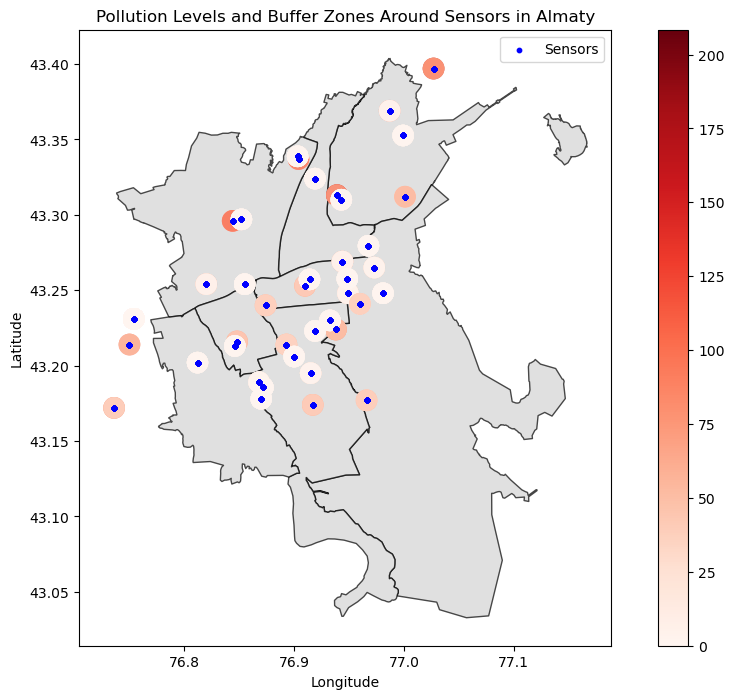

In [5]:
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point


class AQApp(tk.Tk):
    def __init__(self):
        super().__init__()
        self.title("Almaty AirQ")
        self.geometry("600x400")

        self.frames = {}
        for F in (HomePage, VizPage):
            page_n = F.__name__
            frame = F(parent=self, controller=self)
            self.frames[page_n] = frame
            frame.grid(row=0, column=0, sticky="nsew") 

        self.show_frame("HomePage")

    def show_frame(self, pagename):
        frame = self.frames[pagename]
        frame.tkraise()


class HomePage(tk.Frame):
    def __init__(self, parent, controller):
        super().__init__(parent) 
        self.controller = controller
        tk.Label(self, text="Air Quality Dashboard", font=("Arial", 24)).pack(pady=20)
        tk.Button(self, text="Data Visualization", command=lambda: controller.show_frame("VizPage")).pack(pady=10)


class VizPage(tk.Frame):
    def __init__(self, parent, controller):
        super().__init__(parent)
        self.controller = controller

        tk.Label(self, text="Data Visualization", font=("Arial", 18)).pack(pady=20)

        self.plot_frame = tk.Frame(self)
        self.plot_frame.pack(fill="both", expand=True)

        self.plot_map()

    def plot_map(self):
        # Load Almaty district boundaries
        almaty_boundaries = gpd.read_file('notebook/almaty-districts.geo.json')

        start_date = '2019-03-22'
        end_date = '2019-03-25'
        filtered_gdf = combined_gdf[(combined_gdf['date'] >= start_date) & (combined_gdf['date'] <= end_date)]

        filtered_gdf = gpd.GeoDataFrame(filtered_gdf, geometry=filtered_gdf['geometry'], crs="EPSG:4326")
        filtered_gdf = filtered_gdf.to_crs(almaty_boundaries.crs)

        # Precompute buffer zones if not already done
        if 'buffer_zone' not in combined_gdf.columns:
            gdf_projected = combined_gdf.to_crs(epsg=32642)
            gdf_projected['buffer_zone'] = gdf_projected.geometry.buffer(800) 
            combined_gdf['buffer_zone'] = gdf_projected['buffer_zone'].to_crs(almaty_boundaries.crs)

        # Filter buffer zones for the selected dates
        buffers = combined_gdf[(combined_gdf['date'] >= start_date) & (combined_gdf['date'] <= end_date)]
        buffers = gpd.GeoDataFrame(buffers, geometry=buffers['buffer_zone'], crs="EPSG:4326")

        # plotting
        fig, ax = plt.subplots(1, 1, figsize=(12, 8))

        # plotting boundaries
        almaty_boundaries.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.7)
        buffers.plot(column='Reading', cmap='Reds', legend=True, ax=ax, alpha=0.5)
        filtered_gdf.plot(ax=ax, color='blue', markersize=10, label='Sensors')

        plt.title("Pollution Levels and Buffer Zones Around Sensors in Almaty")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.legend()
        plt.show()

        canvas = FigureCanvasTkAgg(fig, master=self.plot_frame)
        canvas.draw()
        canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)


app = AQApp()
app.mainloop()

In [4]:
app = AQApp()
app.mainloop()